In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv


In [2]:
import pandas as pd 


In [3]:
car =pd.Series(['BMW' , 'Audi' , 'Volkswagen']) ; 
colours = pd.Series(['Red' , 'Orange' , 'Silver']) 

car_data = pd.DataFrame({'Car Make' : car , 'Colour' : colours}) ; 
car_data

,Car Make,Colour
0,BMW,Red
1,Audi,Orange
2,Volkswagen,Silver


# Import Data 

In [4]:
# index number starting from 0 the row has axis = 0 and column has axis = 1¶
car_sales = pd.read_csv("/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv")

# Exporting a DataFrame

In [5]:
export = car_sales.head(10) ; 
export.to_csv("Exported_car_sales.csv", index = False) ; 

In [6]:
exported_data = pd.read_csv("Exported_car_sales.csv")
exported_data 


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


# Describe Data 

In [7]:
# Attribute 
exported_data.dtypes 



Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [8]:
car_columns = exported_data.columns
car_columns 

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [9]:
exported_data.index

RangeIndex(start=0, stop=10, step=1)

#                           Functions 

In [10]:
exported_data.mean(numeric_only = True)


Year               2018.30
Engine_Size_L         2.34
Mileage_KM       100682.80
Price_USD         81560.00
Sales_Volume       4901.70
dtype: float64

In [11]:
# Describe works on only numeric columns 
exported_data.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2018.300000,2.340000,100682.800000,81560.000000,4901.700000
std,3.683296,0.994652,65469.992824,27512.833894,2976.035881
min,2013.000000,1.600000,10991.000000,42926.000000,632.000000
25%,2016.000000,1.700000,38793.250000,56540.750000,3167.000000
50%,2018.000000,1.850000,121413.500000,87738.000000,4229.000000
75%,2021.500000,2.775000,144343.750000,101768.500000,7710.250000
max,2024.000000,4.500000,196741.000000,116482.000000,8944.000000


In [12]:
exported_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 10 non-null     object 
 1   Year                  10 non-null     int64  
 2   Region                10 non-null     object 
 3   Color                 10 non-null     object 
 4   Fuel_Type             10 non-null     object 
 5   Transmission          10 non-null     object 
 6   Engine_Size_L         10 non-null     float64
 7   Mileage_KM            10 non-null     int64  
 8   Price_USD             10 non-null     int64  
 9   Sales_Volume          10 non-null     int64  
 10  Sales_Classification  10 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1012.0+ bytes


# Targeting a particular column 

In [13]:
# mean , median all can be calculated 
exported_data["Price_USD"].sum()

815600

In [14]:
len(exported_data)

10

# Viewing and Selecting Data 

In [15]:
# if you dont give any parameter inside head it fetches the top 5 
exported_data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


# .loc and iloc

In [16]:
animals = pd.Series(["Dog" , "Cat" , "Panda" ,"Rabbit"] , index = [0,3,6,9])
animals 

0       Dog
3       Cat
6     Panda
9    Rabbit
dtype: object

In [17]:
# Loc refers to the index numbers 
animals.loc[3]       

'Cat'

In [18]:
# ILoc refers to the position not the index 
animals.iloc[3]

'Rabbit'

# Slicing using loc and iloc 

In [19]:
# Show me the data upto the position three 
animals.iloc[:3]
# show me the data upto index 3 
exported_data.loc[:3]

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low


In [20]:
# exported_data.Region or exported_data["Region"] is the same thing although if your
# column name has space in it dot notation wont work 

In [21]:
exported_data


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low


In [22]:
exported_data[exported_data["Year"] <= 2017]

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High


In [23]:
exported_data["Engine_Size_L"] += 1

In [24]:
pd.crosstab(exported_data["Color"] , exported_data["Fuel_Type"])

Fuel_Type,Diesel,Electric,Hybrid,Petrol
Color,,,,
Black,2,0,0,0
Blue,0,0,0,2
Red,0,0,1,1
Silver,1,0,0,0
White,2,1,0,0


In [25]:
# Group By 
exported_data.groupby(["Year"]).mean(numeric_only = True)
exported_data.head()


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,4.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,2.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,5.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,2.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,3.1,122131,49898,3080,Low


<Axes: >

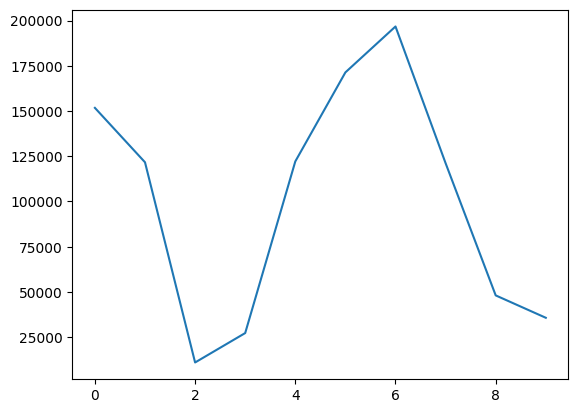

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt 

exported_data["Mileage_KM"].plot()

# Histogram 

<Axes: >

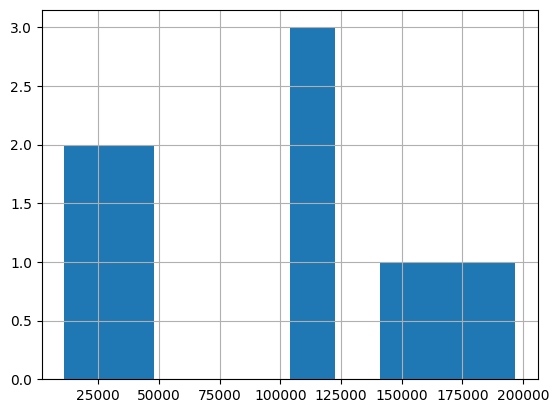

In [27]:
exported_data["Mileage_KM"].hist()

In [28]:
pd.crosstab(exported_data["Color"] , exported_data["Fuel_Type"])

Fuel_Type,Diesel,Electric,Hybrid,Petrol
Color,,,,
Black,2,0,0,0
Blue,0,0,0,2
Red,0,0,1,1
Silver,1,0,0,0
White,2,1,0,0


# Manipulating Data 

In [29]:
exported_data.Color.str.upper()
# just doing this is not going to apply changes to the main data you need to reassign it 

# so reassigning it 

exported_data["Color"] = exported_data["Color"].str.upper() ;


In [30]:
exported_data.loc[[2,5,8] ,"Mileage_KM"] = 121671

In [31]:
Missing_data = exported_data

In [32]:
Missing_data.loc[[2,5,8] , "Mileage_KM"] = None
Missing_data.loc[Missing_data["Color"] == "BLACK", "Color"] = None

# Dealing with Missing data 

In [33]:
Missing_data["Mileage_KM"] = Missing_data["Mileage_KM"].fillna(Missing_data["Mileage_KM"].mean()) ; 

In [34]:
Missing_data["Color"] = Missing_data["Color"].fillna("Orange") ; 

In [35]:
Missing_data[Missing_data["Color"] == "Orange"]

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
4,7 Series,2020,South America,Orange,Diesel,Manual,3.1,122131.0,49898,3080,Low
7,M5,2014,Asia,Orange,Diesel,Automatic,2.6,121156.0,102778,632,Low


In [36]:
# This will drop the values with na 
Missing_data.dropna(inplace = True)

In [37]:
Missing_data 

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,RED,Petrol,Manual,4.5,151748.000000,98740,8300,High
1,i8,2013,North America,RED,Hybrid,Automatic,2.6,121671.000000,79219,3428,Low
2,5 Series,2022,North America,BLUE,Petrol,Automatic,5.5,110914.571429,113265,6994,Low
3,X3,2024,Middle East,BLUE,Petrol,Automatic,2.7,27255.000000,60971,4047,Low
4,7 Series,2020,South America,Orange,Diesel,Manual,3.1,122131.000000,49898,3080,Low
5,5 Series,2017,Middle East,SILVER,Diesel,Manual,2.9,110914.571429,42926,1232,Low
6,i8,2022,Europe,WHITE,Diesel,Manual,2.8,196741.000000,55064,7949,High
7,M5,2014,Asia,Orange,Diesel,Automatic,2.6,121156.000000,102778,632,Low
8,X3,2016,South America,WHITE,Diesel,Automatic,2.7,110914.571429,116482,8944,High
9,i8,2019,Europe,WHITE,Electric,Manual,4.0,35700.000000,96257,4411,Low
